# Benford  for Python

### This little module is an attempt to facilitate the performance of Benford's Law-related tests by people using Python, whether interactively or in an automated, scripting way.
### It is open source, licensed under the GNU General Public License version 3.
### It is based on pandas and uses some numpy, and matplotlib for plotting. I've been testing in Python 2 and 3, so feel free to file a bug report if you run into some trouble.

# Installation

### cd into the site-packages subfolder of your python distribution and clone from there:
### $ git clone https://github.com/milcent/Benford_py.git.

# Demo

### This demo assumes you have (at least) some familiarity with Benford's Law.

### First let's import some libraries and the benford module.

In [14]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas_datareader.data as web

import benford as bf

### Quick start

#### Getting some public data, the S&P500 EFT quotes

In [15]:
sp = web.DataReader('SPY', 'yahoo', start='1990-01-01', end='2017-03-31') # get SPY quotes from yahoo! finance

#### Creating simple and log return  columns

In [16]:
#adding '_' to facilitate handling the column
sp.rename(columns={'Adj Close':'Adj_Close'}, inplace=True) 
sp['p_r'] = sp.Adj_Close/sp.Adj_Close.shift()-1        #simple returns
sp['l_r'] = np.log(sp.Adj_Close/sp.Adj_Close.shift())  #log returns
sp.tail()

,Open,High,Low,Close,Volume,Adj_Close,p_r,l_r
Date,,,,,,,,
2017-03-27,231.929993,233.919998,231.610001,233.619995,87454500,233.619995,-0.001026,-0.001027
2017-03-28,233.270004,235.809998,233.139999,235.320007,93483900,235.320007,0.007277,0.007250
2017-03-29,234.990005,235.809998,234.729996,235.539993,61950400,235.539993,0.000935,0.000934
2017-03-30,235.470001,236.520004,235.270004,236.289993,56737900,236.289993,0.003184,0.003179
2017-03-31,235.899994,236.509995,235.679993,235.740005,73733100,235.740005,-0.002328,-0.002330


### First Digits Test

### Let us see if the SPY log retunrs conform to Benford's Law 

Initialized sequence with 6029 registries.

Test performed on 6029 registries.
Discarded 0 records < 1 after preparation.


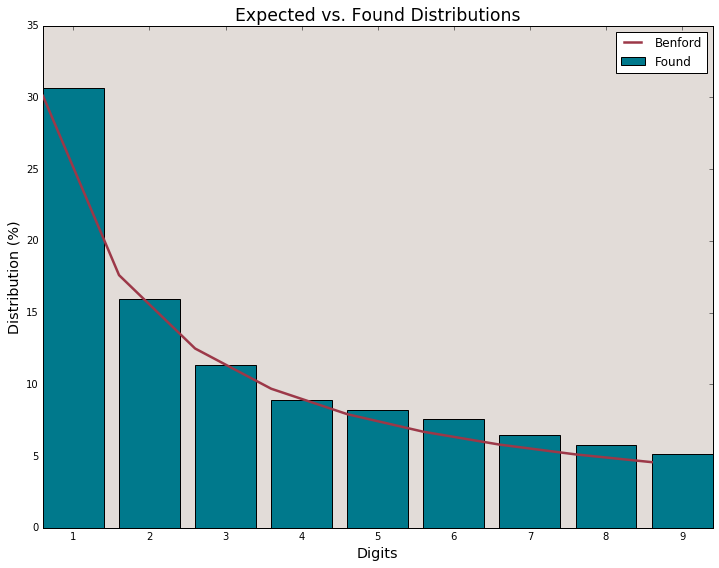

In [17]:
f1d = bf.first_digits(sp.l_r, digs=1, decimals=8)

### The *first_digits* function draws the plot (default) with bars fot the digits found frequencies and a line corresponding to the expected Benford proportions. 

### It also returns a DataFrame object with Counts, Found proportions and Expected values for each digit in the data studied.

In [18]:
f1d

,Counts,Found,Expected
First_1_Dig,,,
1,1848,0.306518,0.301030
2,960,0.159230,0.176091
3,686,0.113783,0.124939
4,536,0.088904,0.096910
5,497,0.082435,0.079181
6,456,0.075634,0.066947
7,389,0.064521,0.057992
8,348,0.057721,0.051153
9,309,0.051252,0.045757


### First Two Digist

Initialized sequence with 6029 registries.

Test performed on 6029 registries.
Discarded 0 records < 10 after preparation.


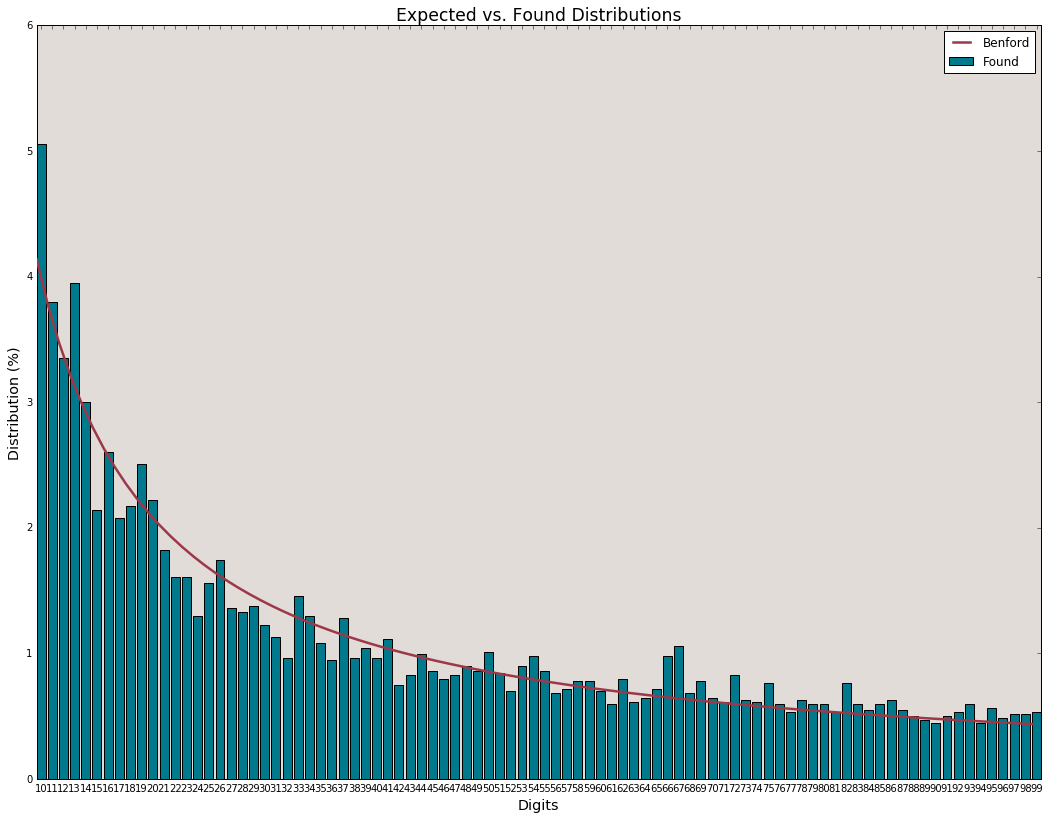

In [19]:
f2d = bf.first_digits(sp.l_r, digs=2, decimals=8) # Note the parameter digs=2!

In [20]:
f2d.head()

,Counts,Found,Expected
First_2_Dig,,,
10,305,0.050589,0.041393
11,229,0.037983,0.037789
12,202,0.033505,0.034762
13,238,0.039476,0.032185
14,181,0.030022,0.029963


In [21]:
f2d.tail()

,Counts,Found,Expected
First_2_Dig,,,
95,34,0.005639,0.004548
96,29,0.004810,0.004501
97,31,0.005142,0.004454
98,31,0.005142,0.004409
99,32,0.005308,0.004365


### Assessing concormity

### There a bunch of tests to more precisely evaluate if the data studied is a good fit to Benford's Law.

### The first we'll use is the Z statistic for the proportions.
### In the module digits functions, you can turn it on by settign the parameter *Z_conf_level*, which will tell the function which confidence level to consider after calculating the Z score for each proportion.

Initialized sequence with 6029 registries.

Test performed on 6029 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_2_Dig                              
67           0.006434  0.010615  3.980023
10           0.041393  0.050589  3.552315
13           0.032185  0.039476  3.171259
66           0.006531  0.009786  3.057914
82           0.005264  0.007630  2.449255
72           0.005990  0.008293  2.233801


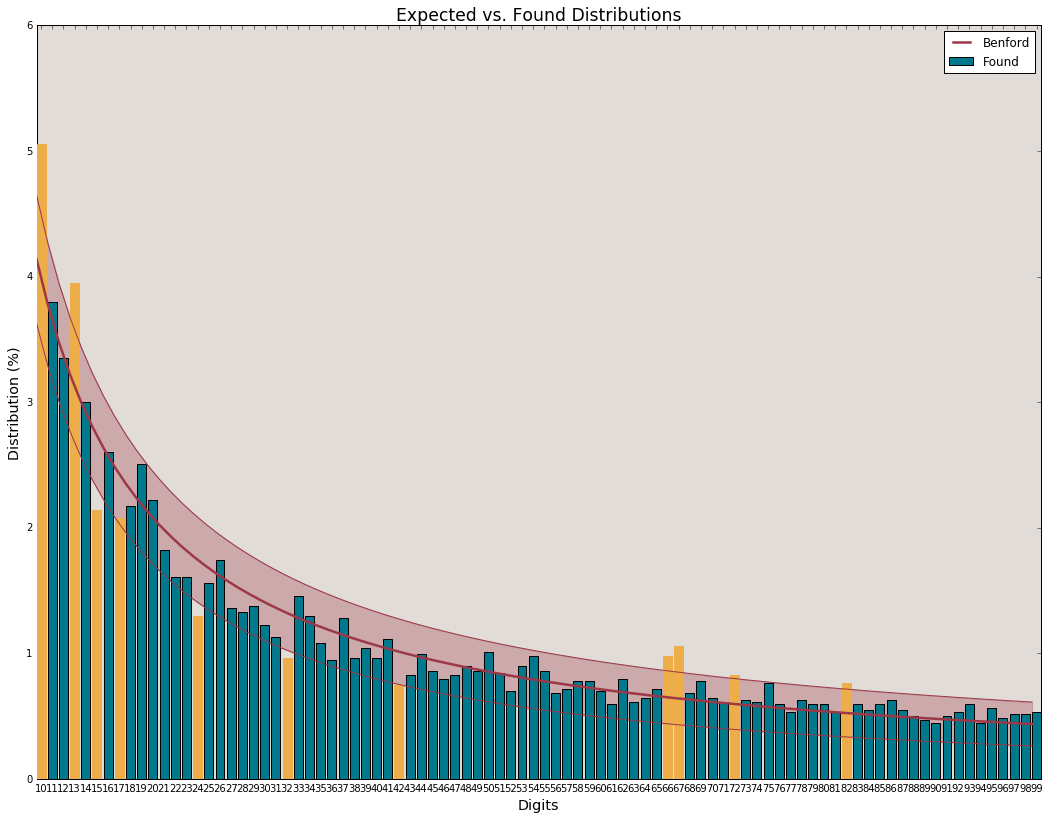

In [22]:
# For a significance of 5%, a confidence of 95
f2d = bf.first_digits(sp.l_r, digs=2, decimals=8, Z_conf_level=95)

### Some things happened:
### <li>It printed a DataFrame wiith the most significant positive deviations, in descending order of the Z score.</li>
### <li>In the plot, to the Benford Expected line, it added upper and lower boundaries, based on the confidence level set to theh *Z_conf_level* parameter. Accordingly, it changed the colors of the bars whose proportions fell lower or higher than the drawn boundaries, for better vizualisation.</li>

### Other tests

### We can do all this with the *First Three Digits*, *Second Digit* and the *Last Two Digits* tests too.

Initialized sequence with 6029 registries.

Test performed on 6029 registries.
Discarded 0 records < 100 after preparation.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_3_Dig                              
952          0.000456  0.001659  4.072761
962          0.000451  0.001493  3.504961
862          0.000504  0.001493  3.136911
997          0.000435  0.001327  3.009661
823          0.000527  0.001493  2.984556
139          0.003113  0.005308  2.942979
945          0.000459  0.001327  2.843428
751          0.000578  0.001493  2.687925
171          0.002532  0.004312  2.622109
874          0.000497  0.001327  2.604667


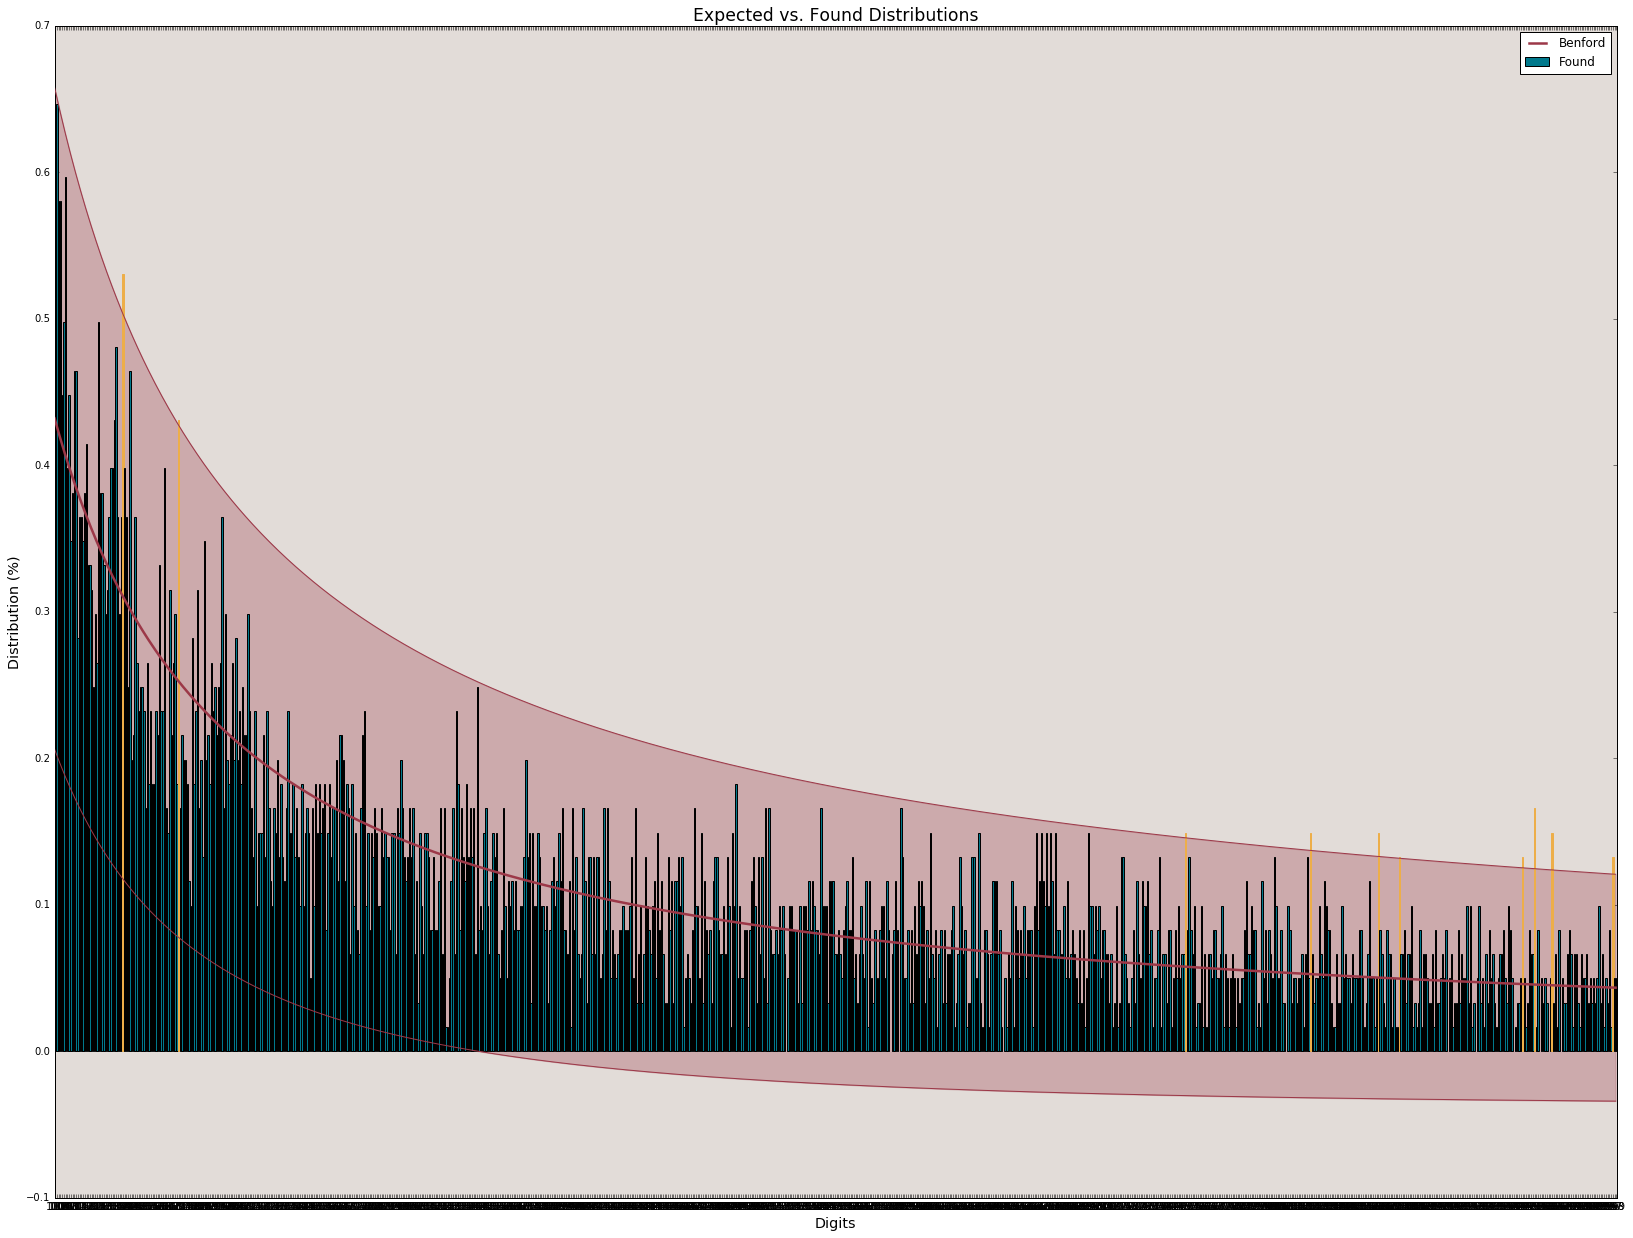

In [23]:
# First Three Digits Test, now with 99% confidence level
f3d = bf.first_digits(sp.l_r, digs=3, decimals=8, Z_conf_level=99)

In [24]:
# The First Three Digits plot is better seen and zoomed in and out without the inline plotting.
# Try %matplotlib

Initialized sequence with 6029 registries.

Test performed on 6029 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

         Expected     Found   Z_score
Sec_Dig                              
0        0.119679  0.128711  2.140763


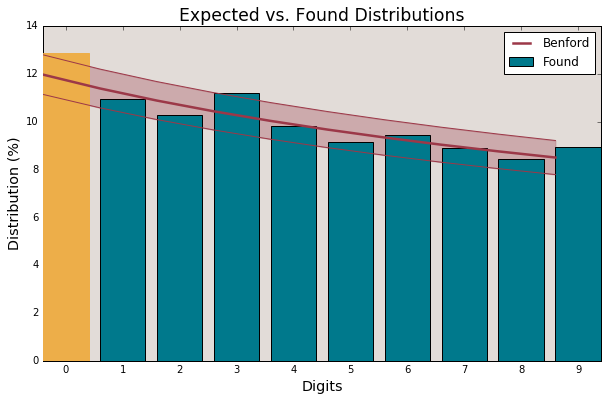

In [25]:
# Second Digit Test
sd = bf.second_digit(sp.l_r, decimals=8, Z_conf_level=95)

Initialized sequence with 6029 registries.

Test performed on 6029 registries.
Discarded 0 records < 1000 after preparation

The entries with the significant positive deviations are:

            Expected     Found   Z_score
Last_2_Dig                              
37          0.010101  0.013435  2.524515
85          0.010101  0.013435  2.524515
97          0.010101  0.013435  2.524515
56          0.010101  0.013269  2.395720
9           0.010101  0.012772  2.009334


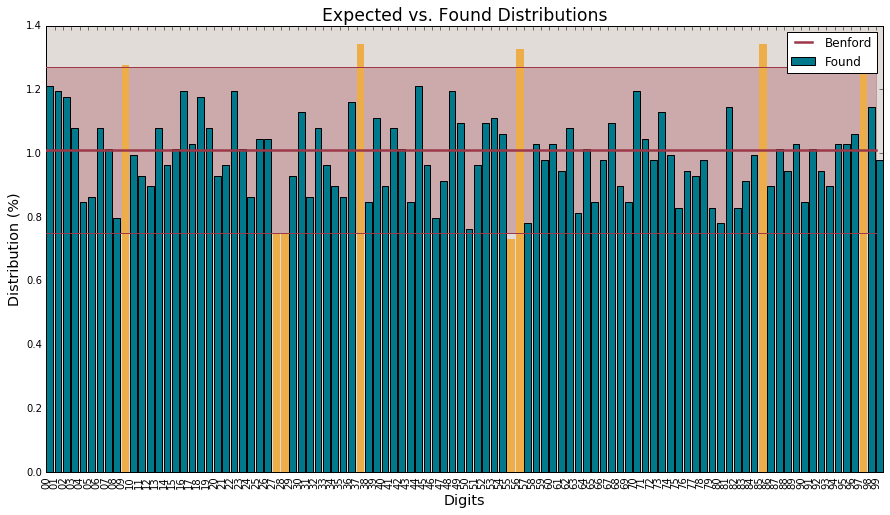

In [26]:
# Last Two Digits Test
l2d = bf.last_two_digits(sp.l_r, decimals=8, Z_conf_level=95)

### Other Important Parameters

### <li>*digs*: only used in the First Digits function, to tell it which test to run: 1- First Digits; 2- Fist Two Digits; and 3- First Three Digits.</li>
### <li>*decimals*: informs the number of decimal places to consider. Defaluts to 2, for currencies, but I set it to 8 here, since we are dealing with log returns. If the sequence is of integers, set it to 0. You may also set it to *infer* if you don't know exactly or if the data has registries with different number of decimal places, and it will treat every registry separately.</li>
### <li>*sign*: tells which portion of the data to consider. *pos*: only the positive entries; *neg*: only the negative ones; *all*: all entries but zeros. Defaults to *all*.</li>
### <li>*inform*: gives information about the test during its run, like the number of registries analysed, the number of registries discarded according to each test (ie, < 10 for the First Digits), and shows the top Z scores of the resulting DataFrame if *Z_conf_level* is not None.</li>
### <li>*high_Z*: chooses which Z scores to be used when displaying results, according to the confidence level chosen. Defaluts to *pos*, which will return only values higher than the expexted frequencies; *neg* will return only values lower than the expexted frequencies; 'all' will return both extremes (positive and negative); and an integer, which will use the first n entries, positive and negative, regardless of whether Z is higher than the Z_conf_level or not.</li>
### <li>*limit_N*: sets a limit to the sample size for the calculation of the Z score. This may be found useful if the sample is too big, due to the Z test power problem. Defaults to None.</li>
### <li>*show_plot*: draws the test plot. Defaults to True. Note that if *Z_conf_level* is not None, the plot will highlight the bars outside the lower and upper boundaries, regardless of the *high_Z* value.</li>
### <li>*MAD* and *MSE*: calculate, respectively, the Mean Absolute Deviation and the Mean Squared Error of the sample, for each test. Default to False. Both can be used inside the tests' functions or separetely, in their own functions, mad and mse.</li>

## Thst's it for a (not so) quick start. I shall continue with the MAD and its critical values.
## Give it a go and post doubts and issues.